In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DatetimeIndex(['2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
               '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-02-26',
               ...
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
               '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16'],
              dtype='datetime64[ns]', length=150, freq=None)

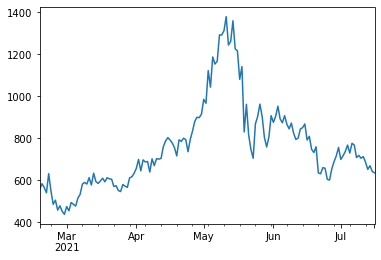

In [89]:
eth = pd.read_csv("ETH.csv").set_index("Date")
rai = pd.read_csv("RAI.csv").set_index('Date')
rai.index = pd.to_datetime(rai.index)
rai.index = pd.to_datetime(rai.index.date)
eth.index = pd.to_datetime(eth.index)
prices = pd.concat([eth, rai], axis=1).dropna()
prices.columns = ['ETH', 'RAI']
prices['RAI'] = prices['RAI'].astype(float)
prices['ETH'] = prices['ETH'].astype(float)
prices['Ratio'] = prices['ETH'] / prices['RAI']
prices['Ratio'].plot(kind='line')
plt.show()

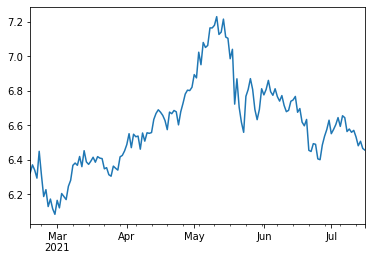

In [90]:
prices["Log Ratio"] = np.log(prices['Ratio']+1)
prices['Log Ratio'].plot(kind='line')
plt.show()

In [91]:
prices['Log Ratio Diff'] = prices['Log Ratio'].diff()

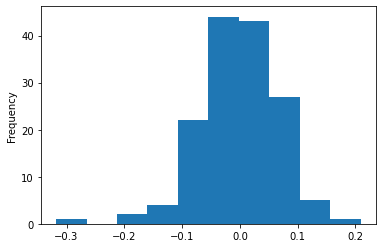

In [92]:
prices['Log Ratio Diff'].plot.hist(bins=10)
plt.show()

In [93]:
import seaborn as sns


<AxesSubplot:xlabel='Log Ratio Diff', ylabel='Density'>

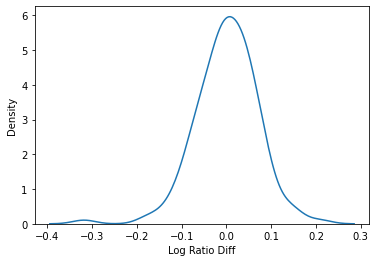

In [94]:
sns.kdeplot(prices['Log Ratio Diff'])

In [95]:
initial_ratio = prices['Log Ratio'].iloc[-1]

In [96]:
from scipy.stats import norm
mu, std = norm.fit(prices['Log Ratio Diff'].dropna())

In [97]:
mu = mu/24
std = std / (24**.5)

In [180]:
mu*100

0.0036906289210966747

In [177]:
mu, std

(3.690628921096675e-05, 0.014081285145600045)

In [98]:
run = 0
timesteps = 100
np.random.seed(seed=run)
deltas = np.random.normal(mu, std, 100)
ratios = np.exp(initial_ratio + deltas.cumsum()) - 1

In [181]:
initial_ratio

6.455903839554217

In [99]:
np.exp(0)

1.0

In [100]:
rai_res = 4953661
eth_res = 7785

In [101]:
rai_res/eth_res

636.3084136159281

$$ A \cdot B = C$$
$$ (A+\Delta A) \cdot (B + \Delta B) = C$$

$$ A \Delta B + B \Delta A + \Delta B \Delta A = 0$$


$$ \frac{A}{B} = R_{1}$$
$$ \frac{A+\Delta A}{B + \Delta B} = R_{2}$$

$$ A = B R_{1}$$
$$ A+\Delta A = R_{2} [B + \Delta B]$$

$$ B R_{1}+\Delta A = R_{2} [B + \Delta B]$$

$$ \Delta A = B R_{2} + \Delta B R_{2} - B R_{1}$$

$$ A \Delta B + [B  + \Delta B] \cdot [B R_{2} + \Delta B R_{2} - B R_{1}] - B R_{1}] = 0$$



In [104]:
rai_res / eth_res

636.3084136159281

In [128]:
true = 600

In [165]:
if true < rai_res / eth_res:
    action = "tokenPurchase"
else:
    action = "ethPurchase"

In [175]:
C = rai_res * eth_res
max_shift = abs(rai_res / eth_res - true)
eth_size = 10

In [176]:
if action == "tokenPurchase":
    eth_delta = eth_size
else:
    eth_delta = -eth_size
    
rai_delta = C / (eth_res + eth_delta) - rai_res
implied_shift = abs((rai_res + rai_delta)/ (eth_res + eth_delta) - rai_res / eth_res)

while implied_shift > max_shift:
    eth_size = eth_size/2
    if action == "tokenPurchase":
        eth_delta = eth_size
    else:
        eth_delta = -eth_size

    rai_delta = C / (eth_res + eth_delta) - rai_res
    implied_shift = abs((rai_res + rai_delta)/ (eth_res + eth_delta) - rai_res / eth_res)

In [169]:
eth_size

125.0

In [158]:
implied_shift

74.48494841698971

In [159]:
max_shift

36.30841361592809

In [160]:
(rai_res + rai_delta)/ (eth_res + eth_delta)

561.8234651989384